# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 6, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Guoda Paulauskaite 12255076 & Chayenne **insert last name + student ID**

## Importing packages
Execute the following statement to import the packages `numpy` and `math` and the plotting package Matplotlib.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

The `math` package contains functions such as $\tan$, $\exp$ and the factorial $n \mapsto n!$

In [3]:
# example: the factorial function
math.factorial(5)

120

If you want to access `math.factorial` without typing `math.` each time you use it, use `import from`. Same for `math.exp`

In [19]:
from math import factorial, exp, tan, cos

factorial(5)

120

## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


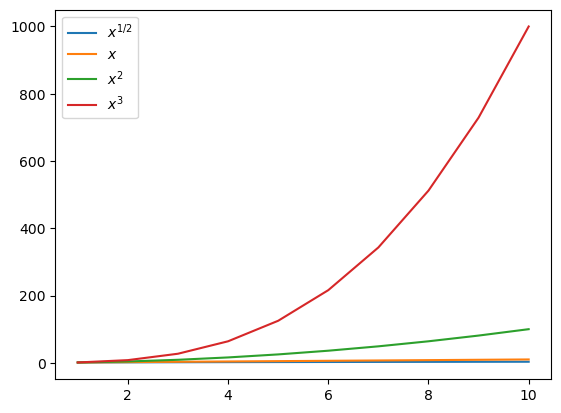

In [5]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

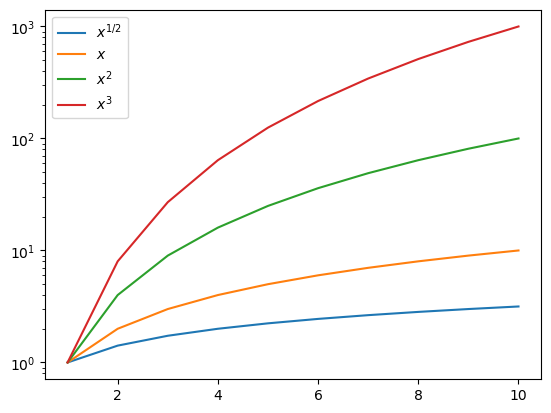

In [6]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


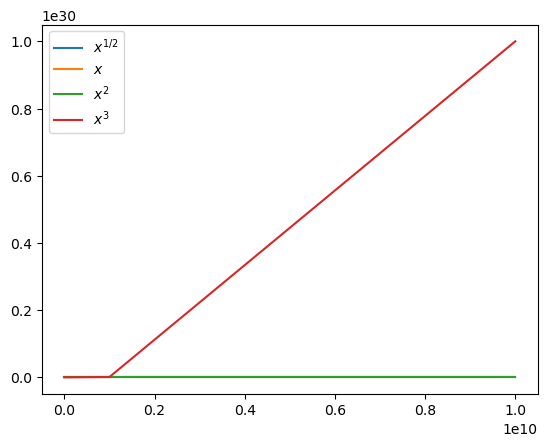

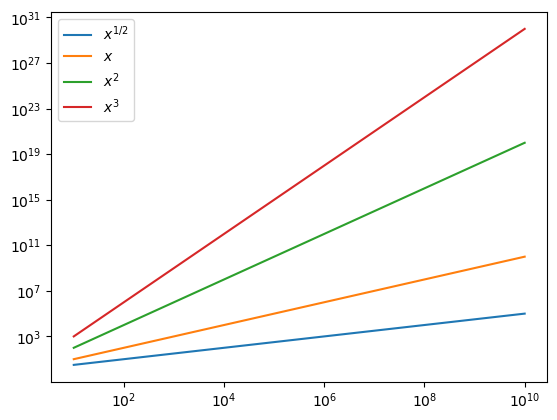

In [7]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Python float types
Information about the Python `float` type is in `sys.float_info`.

In [9]:
import sys

# printing float_info displays information about the python float type
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [10]:
# the individual properties can be accessed as follows
print("epsilon for the python float type: ", sys.float_info.epsilon)

epsilon for the python float type:  2.220446049250313e-16


-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

Analytical solution: derivative of tan(x), x=1 is: 3.425518820814759
Analytical solution: derivative of tan(x), x=1 is: 3.430863217312341


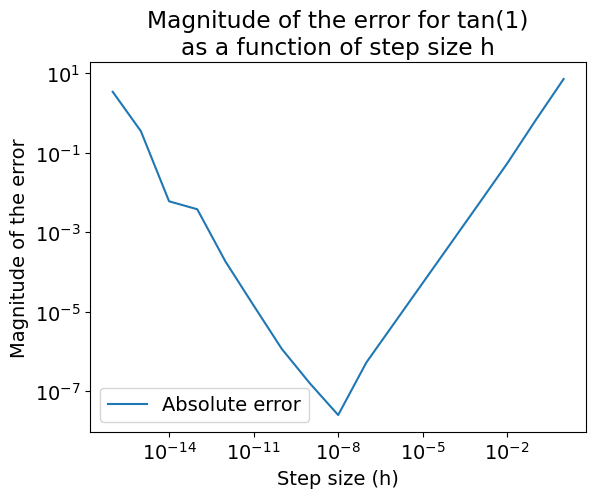

Minimum magnitude of error is 2.554135347665465e-08 at h value 1e-08


In [70]:
def ApproxDerivative(f, x, h):
    '''This function computes f', an approximate derivative of a function f
    It takes as input the function f itself, an input value x, and perturbation h'''
    return (f(x+h)-f(x))/h


###Test with tan(1)###

def SecSquared(x):
    '''Takes an input x and outputs sec^2(x) (derivative of tan(x))'''
    return (1/cos(1))**2

#Analytical solution of tan(x) when x=1:
print(f'Analytical solution: derivative of tan(x), x=1 is: {SecSquared(1)}')
#Approximation of tan(x) when x=1, h=0.001:
print(f'Analytical solution: derivative of tan(x), x=1 is: {ApproxDerivative(tan, 1, 0.001)}')


###Plot the magnitude of error as a function of h###
h = np.logspace(-16, 0, 17, base=10)  # 10 points evenly between 10^-16 and 10^0.

absolute_error_fd = []

for i in range(len(h)):
    absolute_error_fd.append(abs(SecSquared(1)-ApproxDerivative(tan, 1, h[i])))

plt.rcParams.update({'font.size': 14})
plt.loglog(h, absolute_error_fd, label='Absolute error')
plt.xlabel('Step size (h)')
plt.ylabel('Magnitude of the error')
plt.title('Magnitude of the error for tan(1)\nas a function of step size h')
plt.legend()
plt.show()


###Minimum value of the error###
min_error = min(absolute_error_fd)
h_min = h[absolute_error_fd.index(min_error)]
print(f'Minimum magnitude of error is {min_error} at h value {h_min}')

There is a minimum magnitude of error at $h = 2.554*10^{-8}$. εmach for double precision is $1*10^{-16}$. To determine if the formula holds we calculate
$$\sqrt{\epsilon_{\rm mach}} = \sqrt{1*10^{-16}} = 1*10^{-8}$$
Considering $h = 2.554*10^{-8}$ at the minimum magnitude of error and $\sqrt{\epsilon_{\rm mach}} = 1*10^{-8}$:
$$2.554*10^{-8} \approx 1*10^{-8}$$
$$h \approx \sqrt{\epsilon_{\rm mach}}$$





## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

Analytical solution: derivative of tan(x), x=1 is: 3.425518820814759
Analytical solution: derivative of tan(x), x=1 is: 3.4255282713434587


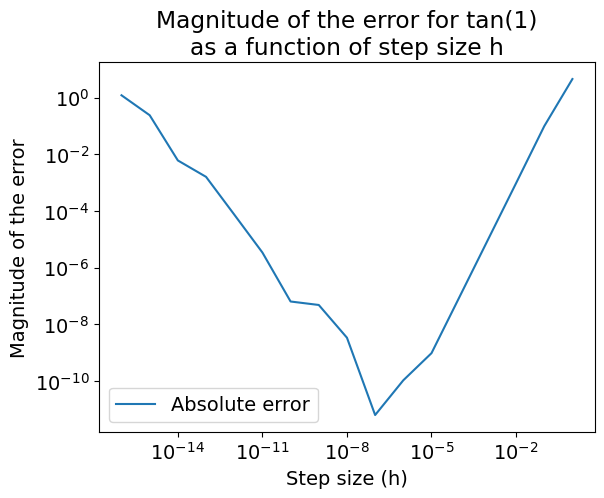

Minimum magnitude of error is 6.2239102760486276e-12 at h value 1e-07


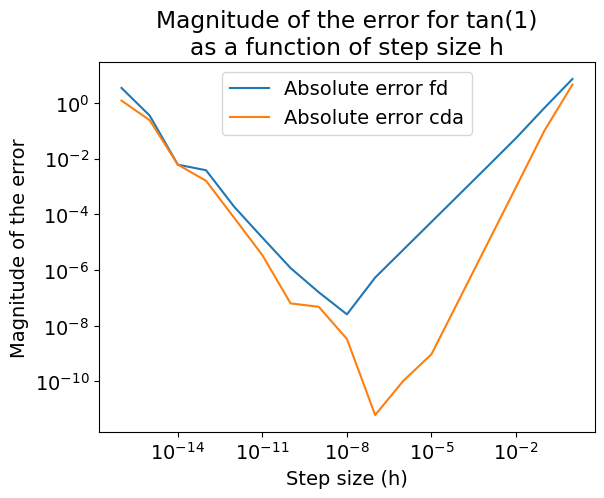

In [71]:
def CenteredDiffApprox(f, x, h):
    '''This value returns the approximate value of a function derivative using centered difference approximation
    As input it takes the function, input x, and the perturbation h and returns f prime.'''
    return (f(x+h) - f(x-h))/(2*h)

###Test with tan(1)###

#Analytical solution of tan(x) when x=1:
print(f'Analytical solution: derivative of tan(x), x=1 is: {SecSquared(1)}')
#Approximation of tan(x) when x=1, h=0.001:
print(f'Analytical solution: derivative of tan(x), x=1 is: {CenteredDiffApprox(tan, 1, 0.001)}')


###Plot the magnitude of error as a function of h###
h = np.logspace(-16, 0, 17, base=10)  # 10 points evenly between 10^-16 and 10^0.

absolute_error_cda = []

for i in range(len(h)):
    absolute_error_cda.append(abs(SecSquared(1)-CenteredDiffApprox(tan, 1, h[i])))

plt.rcParams.update({'font.size': 14})
plt.loglog(h, absolute_error_cda, label='Absolute error')
plt.xlabel('Step size (h)')
plt.ylabel('Magnitude of the error')
plt.title('Magnitude of the error for tan(1)\nas a function of step size h')
plt.legend()
plt.show()


###Minimum value of the error###
min_error = min(absolute_error_cda)
h_min = h[absolute_error_cda.index(min_error)]
print(f'Minimum magnitude of error is {min_error} at h value {h_min}')

#Compare the two formulas
plt.loglog(h, absolute_error_fd, label = 'Absolute error fd')
plt.loglog(h, absolute_error_cda, label = 'Absolute error cda')
plt.xlabel('Step size (h)')
plt.ylabel('Magnitude of the error')
plt.title('Magnitude of the error for tan(1)\nas a function of step size h')
plt.legend()
plt.show()
plt.show()

The above plot shows that the second finite difference formula (centered difference approximation) yields more accurate values as compared to the first one. The magnitude of error (when calculated with centered difference approximation) for all h values is lower than the magnitude of error from the intial finite difference formula. Hence, we conclude that the centered difference approximation is more accurate in approximating the derivative of a function as the truncation error is reduced.
<br><br>
The minimum magnitude of the error is around 6.224e-12 at the h value of 1e-07. This happens because the truncation error with centered difference approximation decreases and leads to a truncation error line shift to the right. Hence, now the truncation error and the rounding error lines intersect at a greater step size value as compared to before.



-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

Write your answer, using $\LaTeX$, in this box.

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

In [11]:
# your code here

Write your answer, using $\LaTeX$, in this box.

## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

Write your answer, using $\LaTeX$, in this box.

In [12]:
# your code here

## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

Write your answer, using $\LaTeX$, in this box.